In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("FEHE.csv")

df = df['provider'].unique()


print(len(df))

217


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("FEHE.csv")

df = df['cah3_subject'].unique()


print(len(df))

84


# Make the thing with studenent per choer in each subject

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# Ensure unique provider–subject combinations
df_unique = df.drop_duplicates(
    subset=["cah3_code", "cah3_subject", "provider"]
)

# ---- Count number of providers and population per CAH3 ----
cah3_summary = (
    df_unique
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        num_providers=("provider", "nunique"),
        num_population=("population", "sum")
    )
)

# Sort for cleaner output
cah3_summary = cah3_summary.sort_values("num_providers", ascending=True)

pop = 0
provider = 0

for x in range(len(cah3_summary)):
    pop += cah3_summary.iloc[x]["num_population"]
    provider += cah3_summary.iloc[x]["num_providers"]

print(pop / provider)


71.83650901667234


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("FEHE.csv")

# Ensure unique provider–subject combinations
df_unique = df.drop_duplicates(
    subset=["cah3_code", "cah3_subject", "provider"]
)

# ---- Count number of providers and population per CAH3 ----
cah3_summary = (
    df_unique
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        num_providers=("provider", "nunique"),
        num_population=("population", "sum")
    )
)

# Sort for cleaner output
cah3_summary = cah3_summary.sort_values("num_providers", ascending=False).iloc[5:]

pop = 0
provider = 0

for x in range(len(cah3_summary)):
    pop += cah3_summary.iloc[x]["num_population"]
    provider += cah3_summary.iloc[x]["num_providers"]

print(pop / provider)


40.8732057416268


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# Ensure unique provider–subject combinations
df_unique = df.drop_duplicates(
    subset=["cah3_subject", ]
)

print(len(df_unique))

160


: 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("onlyUni.csv")

# Ensure unique provider–subject combinations
df_unique = df.drop_duplicates(
    subset=["cah3_code", "cah3_subject", "provider"]
)

# ---- Count number of providers and population per CAH3 ----
cah3_summary = (
    df_unique
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        num_providers=("provider", "nunique"),
        num_population=("population", "sum")
    )
)

# Sort for cleaner output
cah3_summary = cah3_summary.sort_values("num_providers", ascending=False)

pop = 0
provider = 0

for x in range(len(cah3_summary)):
    pop += cah3_summary.iloc[x]["num_population"]
    provider += cah3_summary.iloc[x]["num_providers"]

print(pop / provider)


72.0105421686747


                  provider  population
142  University of Suffolk         476
Number of providers: 1


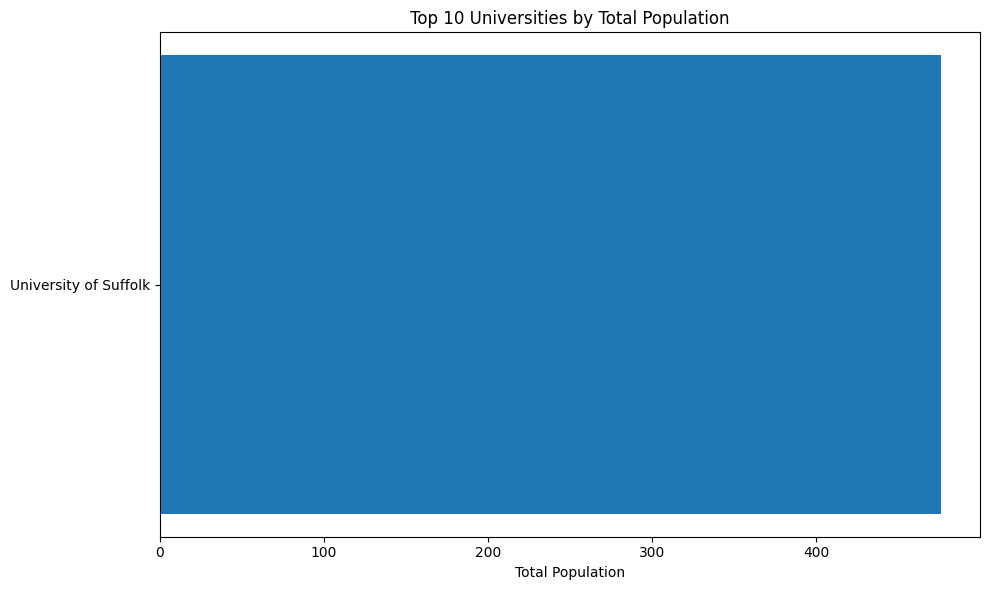

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("onlyUni.csv")

# --- DATA PROCESSING ---

# 1. Select only needed columns
subset = df[['provider', 'population','cah3_subject']]

unique_df = subset.drop_duplicates()

# 2. Group by provider and SUM population
provider_population = (
   unique_df
    .groupby('provider', as_index=False)['population']
    .sum()
)

# 3. OPTIONAL: Exclude online schools by name
online_providers = [
    'University of Suffolk'
]


provider_population = provider_population[
    provider_population['provider'].isin(online_providers)
]


# 4. Sort and take top 10
top_10 = provider_population.sort_values(
    'population', ascending=False
).head(10)

print(top_10)
print("Number of providers:", len(top_10))  # should be 10

# --- PLOTTING ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10['provider'], top_10['population'])
ax.set_title("Top 10 Universities by Total Population")
ax.set_xlabel("Total Population")
ax.invert_yaxis()
plt.tight_layout()
plt.show()
